# Прогнозирование медицинских расходов на основе характеристик клиентов

### Задача проекта — определить, зависят ли индивидуальные медицинские расходы от всех указанных в датасете характеристик и можно ли предсказать размер медицинских расходов

Датасет содержит основную информацию о клиентах страховой компании:

`age` - возраст основного страховщика  
`sex` - пол страховщика  
`bmi` - индекс массы тела  
`children` - количество детей, охваченных медицинской страховкой  
`smoker` - курит ли страховщик  
`region` - жилой район получателя в США (северо-восток, юго-восток, юго-запад, северо-запад)  
`charges` - индивидуальные медицинские расходы, которые покрываются страховкой

## Импорт бибиотек

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Данный код будет игнорировать предупреждения о будущих изменениях в библиотеках 

## Загрука датасета

In [7]:
df = pd.read_csv('Insurance.csv')  # Загружаем данные из CSV-файла в объект DataFrame

## Изучение, предобработка данных

In [11]:
df.head()  # Выводим первые 5 строк DataFrame для предварительного просмотр

,age,sex,bmi,children,smoker,region,charges
0,37.0,male,34.20,1.0,yes,northeast,39047.2850
1,35.0,female,43.34,2.0,no,southeast,5846.9176
2,62.0,male,NaN,50.0,NaN,southeast,NaN
3,53.0,female,26.70,2.0,no,southwest,11150.7800
4,59.0,female,27.83,3.0,no,southeast,14001.2867


In [13]:
df.shape  # Выводим количество полей/строк в датафрейме

(1463, 7)

In [15]:
df.info()  # Выводим краткую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1444 non-null   float64
 1   sex       1461 non-null   object 
 2   bmi       1410 non-null   float64
 3   children  1414 non-null   float64
 4   smoker    1432 non-null   object 
 5   region    1460 non-null   object 
 6   charges   1442 non-null   float64
dtypes: float64(4), object(3)
memory usage: 80.1+ KB


In [17]:
df.describe(include=['object'])  # Выводим категориальные признаки

,sex,smoker,region
count,1461,1432,1460
unique,2,2,4
top,male,no,southeast
freq,746,1141,409


In [19]:
df.describe(exclude=['object'])  # Выводим числовые данные

,age,bmi,children,charges
count,1444.000000,1410.000000,1414.000000,1442.000000
mean,39.267313,30.635181,1.204385,13214.905664
std,14.193710,6.120701,2.554977,12014.715410
min,-2.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.125000,0.000000,4769.417075
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.656250,2.000000,16443.294663
max,64.000000,53.130000,50.000000,63770.428010


In [21]:
df.describe(include='all')  # Выводим описательную статистику по всем колонкам

,age,sex,bmi,children,smoker,region,charges
count,1444.000000,1461,1410.000000,1414.000000,1432,1460,1442.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,746,NaN,NaN,1141,409,NaN
mean,39.267313,NaN,30.635181,1.204385,NaN,NaN,13214.905664
std,14.193710,NaN,6.120701,2.554977,NaN,NaN,12014.715410
min,-2.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.125000,0.000000,NaN,NaN,4769.417075
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.656250,2.000000,NaN,NaN,16443.294663


In [23]:
df.isnull().sum()  # Находим количество пропущенных значений по столбцам 

age         19
sex          2
bmi         53
children    49
smoker      31
region       3
charges     21
dtype: int64

In [25]:
df.isnull().sum().sum()  # Находим общее количество пропусков в датасете

178

In [27]:
df.dropna().shape  # Посмотрим на получившийся размер DataFrame

(1410, 7)

In [29]:
# Рассчитываем процент строк с хотя бы одним пропуском  во всём DataFrame
# Возвращает значение, округлённое до 2 знаков после запятой
round((1 - df.dropna().shape[0] / df.shape[0]) * 100, 2) 

3.62

In [31]:
# Заполняем столбцы sex, smoker и region значениями Unknown:

df['sex'] = df['sex'].fillna('Unknown')  # переопределим, где пропуски заполнены строкой 'Unknown'

df['smoker'].fillna('Unknown', inplace=True)  # заполним все пропуски строкой 'Unknown' и заменим исходный датафрейм 

df['region'].fillna('Unknown', inplace=True)  # аналогично как с колонкой smoker

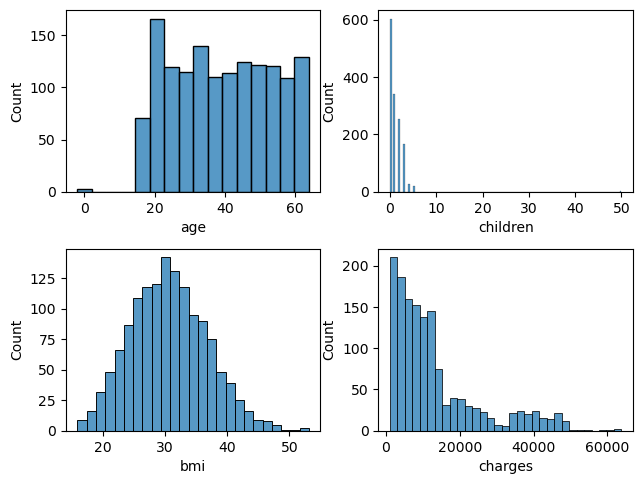

In [33]:
# Рассмотрим распределения числовых признаков 'age', 'children', 'bmi', 'charges'

import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)
sns.histplot(df, x='age', ax=axes[0, 0])
sns.histplot(df, x='children', ax=axes[0, 1])
sns.histplot(df, x='bmi', ax=axes[1, 0])
sns.histplot(df, x='charges', ax=axes[1, 1])
plt.show()

In [35]:
# Заполним столбец bmi значениями среднего
bmi_mean = df['bmi'].mean() # вызываем метод подсчета среднего

df['bmi'].fillna(bmi_mean, inplace=True) # заменяем исходный датафрейм (столбец df['bmi']) новым

In [37]:
# Так как children и age это целочисленные признаки, заполним эти столбцы значениями медианы:
df['age'].fillna(df['age'].median(), inplace=True) # сразу положим медиану, как  value аргумент

df['children'].fillna(df['children'].median(), inplace=True) # аналогично

In [39]:
# Рассмотрим признак charges
# Воспользуемся информацией с графика гистограммы и значениями процентилей — посмотрим на ответ метода df.describe()
# Более 75% значений находится в отрезке [0, 16500], оставшиеся значения могут выступать в роли выбросов при расчете среднего
# Сравниваем среднее значение и медиану:
df['charges'].mean(), df['charges'].median()

(13214.905664333564, 9382.033)

In [41]:
# Можно заметить, что среднее значение менее устойчиво к выбросам данного распределения, заполняем пропуски медианой:
df['charges'].fillna(df['charges'].median(), inplace=True)

In [43]:
df.describe()  # Выводим описание числовых данных

,age,bmi,children,charges
count,1463.000000,1463.000000,1463.000000,1463.000000
mean,39.263841,30.635181,1.197539,13159.888353
std,14.101211,6.008734,2.512065,11936.829585
min,-2.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4834.106150
50%,39.000000,30.635181,1.000000,9382.033000
75%,51.000000,34.400000,2.000000,16100.216000
max,64.000000,53.130000,50.000000,63770.428010


In [45]:
# У 75% данных величина переменной равна всего 2, однако у переменной children максимальное значение равняется 50 — это можно считать выбросом
# Удаляем строки со значением 50, но перед этим скопируем наш датасет

df_origin = df.copy()  # Cоздаем переменную df_origin и воспользуемся методом pandas.DataFrame.copy(), который возвращает полную копию объекта

df = df_origin.copy()  # можем воспользоваться обратным копированием, когда захотим вернуться к исходному датасету

index_of_anomaly = df[df.children == 50].index # Возвращает индексы таблицы  len(index_of_anomaly) -> таких записей 3 шт [2, 170, 1356]
print(index_of_anomaly)

df.drop(index_of_anomaly, inplace=True) # аналогично с .dropna(),  аргумент inplace=True заменяет исходный датафрейм, а не возвращает копию

Index([2, 170, 1356], dtype='int64')


In [47]:
df[['age','bmi', 'children', 'charges']].max()  # После удаления можно заметить, что максимумы пришли в норму

age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64

In [49]:
#  В наших данных встречается также отрицательный возраст — строки с таким возрастом тоже можно удалить:
index_of_age_anomaly = df[df.age == -2].index
df.drop(index_of_age_anomaly, inplace=True)

In [51]:
df[['age','bmi', 'children', 'charges']].min()  # Проверим, что данные удалились

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64

In [53]:
df[df.duplicated()]  # Проверяем дублирующие строки датафрейма

,age,sex,bmi,children,smoker,region,charges
133,23.0,male,37.100,3.0,no,southwest,3597.59600
169,19.0,female,18.600,0.0,no,southwest,1728.89700
205,52.0,male,24.320,3.0,yes,northeast,24869.83680
363,46.0,male,43.890,3.0,no,southeast,8944.11510
381,35.0,male,34.320,3.0,no,southeast,5934.37980
...,...,...,...,...,...,...,...
1425,28.0,male,29.260,2.0,no,northeast,4438.26340
1429,23.0,male,32.560,0.0,no,southeast,1824.28540
1435,44.0,male,22.135,2.0,no,northeast,8302.53565
1437,53.0,male,30.495,0.0,no,northeast,10072.05505


In [55]:
df.drop_duplicates(inplace=True)  # Удаляем дубликаты

In [57]:
df.corr(numeric_only=True)  # Вычисляем парные корреляции между всеми числовыми столбцами DataFrame

,age,bmi,children,charges
age,1.000000,0.107912,0.040160,0.297013
bmi,0.107912,1.000000,0.012759,0.197171
children,0.040160,0.012759,1.000000,0.067480
charges,0.297013,0.197171,0.067480,1.000000


In [59]:
# Получившиеся значения корреляции далеки от обозначенных теоретических порогов, но это не значит, что датасет не пригоден для анализа

In [61]:
# В данных о страховках есть несколько категориальных переменных, которые мы заменим с помощью метода replace
sex_to_replace = {'male': 0, 'female': 1, 'Unknown': -1}
smoker_to_replace = {'no': 0, 'yes': 1, 'Unknown': -1}

df['sex'] = df['sex'].replace(sex_to_replace)
df['smoker'] = df['smoker'].replace(smoker_to_replace)

In [63]:
region_cat = pd.get_dummies(df.region)  # В случае переменной 'region' используем метод pandas.get_dummies, 
# который создает набор переменных, каждая из которых принимает только значение  True или False

In [65]:
# Для завершения предобработки данных данного датасета соединим получившийся датасет с обработанным категориальным признаком (pd.concat) 
df = pd.concat([df, region_cat], axis = 1)
df.drop('region', inplace = True, axis = 1) # Также удалим ненужную нам переменную 

In [67]:
df

,age,sex,bmi,children,smoker,charges,Unknown,northeast,northwest,southeast,southwest
0,37.0,0,34.200,1.0,1,39047.28500,False,True,False,False,False
1,35.0,1,43.340,2.0,0,5846.91760,False,False,False,True,False
3,53.0,1,26.700,2.0,0,11150.78000,False,False,False,False,True
4,59.0,1,27.830,3.0,0,14001.28670,False,False,False,True,False
5,27.0,0,32.670,0.0,0,2497.03830,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1458,31.0,1,21.755,0.0,0,4134.08245,False,False,True,False,False
1459,56.0,0,33.630,0.0,1,43921.18370,False,False,True,False,False
1460,34.0,1,26.410,1.0,0,5385.33790,False,False,True,False,False
1461,54.0,1,31.240,0.0,0,10338.93160,False,False,False,True,False


In [69]:
df.corr()

,age,sex,bmi,children,smoker,charges,Unknown,northeast,northwest,southeast,southwest
age,1.000000,0.007681,0.107912,0.040160,-0.027188,0.297013,-0.000558,0.003880,-0.000709,-0.011000,0.008295
sex,0.007681,1.000000,-0.045274,-0.016120,-0.063708,-0.056562,-0.026220,-0.002910,0.020577,-0.015921,0.000569
bmi,0.107912,-0.045274,1.000000,0.012759,0.003707,0.197171,-0.000122,-0.135958,-0.133951,0.264864,-0.006102
children,0.040160,-0.016120,0.012759,1.000000,0.012957,0.067480,-0.002078,-0.025068,0.026194,-0.022856,0.022732
smoker,-0.027188,-0.063708,0.003707,0.012957,1.000000,0.728112,-0.073431,0.007799,-0.023466,0.059665,-0.041737
charges,0.297013,-0.056562,0.197171,0.067480,0.728112,1.000000,-0.008570,0.010487,-0.036213,0.068486,-0.044930
Unknown,-0.000558,-0.026220,-0.000122,-0.002078,-0.073431,-0.008570,1.000000,-0.015141,-0.015141,-0.016485,-0.015260
northeast,0.003880,-0.002910,-0.135958,-0.025068,0.007799,0.010487,-0.015141,1.000000,-0.317490,-0.345677,-0.319995
northwest,-0.000709,0.020577,-0.133951,0.026194,-0.023466,-0.036213,-0.015141,-0.317490,1.000000,-0.345677,-0.319995
southeast,-0.011000,-0.015921,0.264864,-0.022856,0.059665,0.068486,-0.016485,-0.345677,-0.345677,1.000000,-0.348404


In [71]:
# Видим что Курение (smoker) имеет исключительно сильную положительную корреляцию с медицинскими расходами (charges)

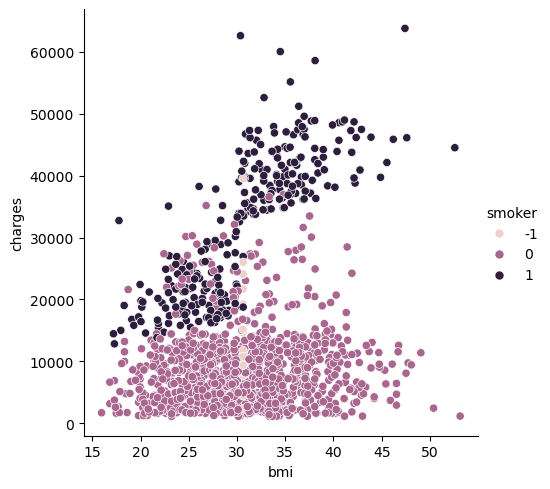

In [77]:
sns.relplot(data=df, x='bmi', y='charges', hue='smoker') # Строим график взаимосвязи между индексом массы тела и  медицинскими расходами

In [79]:
df.groupby('smoker')['charges'].agg(['mean', 'median', 'std'])

,mean,median,std
smoker,,,
-1,12160.228766,9382.03300,7913.559843
0,8437.190618,7418.52200,5948.220378
1,31983.535912,34371.51155,11531.316226


##  Ключевые выводы

### 1. Самый сильный фактор влияния
**Курение (smoker)** имеет исключительно сильную положительную корреляцию с медицинскими расходами:
`corr(smoker, charges) = 0.728` - *сильная положительная связь*
>  Курящие клиенты имеют значительно более высокие медицинские расходы

### 2. Второстепенные факторы
**Возраст (age)** показывает умеренную положительную корреляцию:
`corr(age, charges) = 0.297` - *умеренная положительная связь*
> С увеличением возраста медицинские расходы растут

**ИМТ (bmi)** демонстрирует слабую положительную корреляцию:
`corr(bmi, charges) = 0.197` - *слабая положительная связь*

> Высокий индекс массы тела ассоциирован с несколько более высокими расходами

##  Рекомендации для бизнеса

###  Высокий приоритет:
- **Курение** - ключевой фактор риска. Разработать специальные тарифы и программы по отказу от курения
- **Возраст** - значимый фактор. Учитывать возрастную структуру клиентов при расчете страховых премий

### Средний приоритет:
- **Индекс массы тела** - умеренно влияющий фактор. Ввести программы поощрения для клиентов с нормальным весом

### Низкий приоритет:
- **Количество детей и пол** - практически не влияют на расходы
- **Географический фактор** - минимален, не требует дифференциации тарифов по регионам

---
## Итоговый вывод

> **Страховой компании следует сфокусироваться на борьбе с курением и учитывать возраст клиентов как основные факторы риска при расчете стоимости страховки.**